In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import rice
from platipy.imaging.registration.utils import apply_transform
from platipy.imaging import ImageVisualiser
from platipy.imaging.label.utils import get_com
from shrimpy.augmentation import random_augmentation_transform,  generate_random_vector_field_transform
from shrimpy.augmentation import random_rotation_transform, random_translation_transform, random_scale_transform
from shrimpy.augmentation import consistent_vector_field_transform, generate_smooth_peaked_vector_field
from shrimpy.pipeline import read_augment_write, read_augment_write_directory
from shrimpy.intensity import randomly_augment_image_intensity, apply_noise
from shrimpy.image_generation import visualise_image, compare_image_histograms, create_augmentation_visualisaitons
from shrimpy.image_generation import collate_augmentation_visualisations, create_image_visualisations
%matplotlib inline

In [3]:
original_T1 = sitk.ReadImage("../honours/ISPY2_FIRST126/CONVERTED_PROCESSED/ACRIN-6698-102212/IMG_T1.nii.gz", sitk.sitkFloat64)
original_T2 = sitk.ReadImage("../honours/ISPY2_FIRST126/CONVERTED_PROCESSED/ACRIN-6698-102212/IMG_T2.nii.gz", sitk.sitkFloat64)
original_contour = sitk.ReadImage("../honours/ISPY2_FIRST126/CONVERTED_PROCESSED/ACRIN-6698-102212/MASK_TUMOUR.nii.gz")

In [6]:
print(original_T1.GetSize())

(512, 512, 50)


In [35]:
blank_image = sitk.Image(10, 10, 4, sitk.sitkFloat64)
# blank_image.CopyInformation(original_T1)
select = 2

In [38]:
# df = np.zeros((4, 50, 50, 3), dtype=np.float64)
# df[select, 200, 300, :] = [0, 5, 30]
# df[select+1, 200, 300, :] = [0, 1, 2]
# df_image = sitk.GetImageFromArray(df, isVector=True)
# # df_image.CopyInformation(original_T1)
# # transform = sitk.DisplacementFieldTransform(df_image)


In [36]:
df = generate_smooth_peaked_vector_field((4, 10, 10), (select, 5, 7), (-3/5, -5/5, -3/5), (0.1, 0.1, 0.1))
df_image = sitk.GetImageFromArray(df, isVector=True)

In [37]:
smooth_df = generate_smooth_peaked_vector_field((4, 10, 10), (select, 5, 7), (-3/5, -5/5, -3/5), (1.5, 1.5, 1.5))
smooth_df_image = sitk.GetImageFromArray(smooth_df, isVector=True)

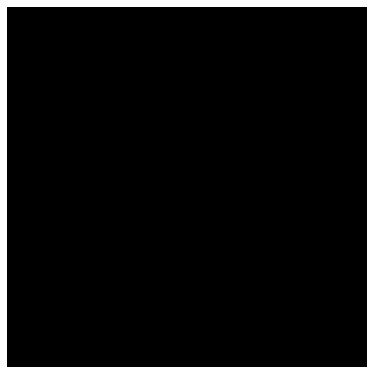

In [41]:
vis = ImageVisualiser(blank_image, cut=2, axis='z', figure_size_in=5)
# vis.add_vector_overlay(df_image, colormap='viridis', arrow_width=0.1, arrow_scale=1, subsample=1, show_colorbar=False)
fig = vis.show()
fig.savefig("results/blank_image")

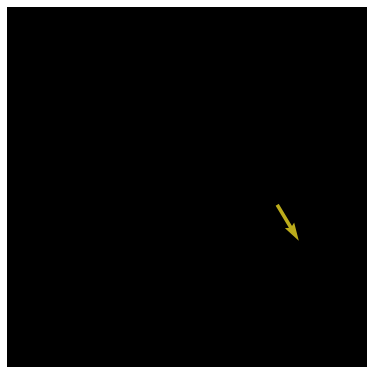

In [38]:
vis = ImageVisualiser(blank_image, cut=2, axis='z', figure_size_in=5)
vis.add_vector_overlay(df_image, colormap='viridis', arrow_width=0.1, arrow_scale=1, subsample=1, show_colorbar=False)
fig = vis.show()
fig.savefig("results/single_voxel_displacement")

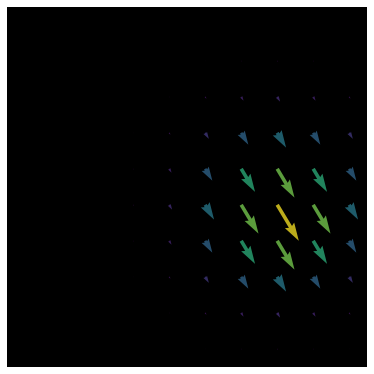

In [40]:
vis = ImageVisualiser(blank_image, cut=select, axis='z', figure_size_in=5)
vis.add_vector_overlay(smooth_df_image, colormap='viridis', arrow_width=0.1, arrow_scale=1, subsample=1, show_colorbar=False)
fig = vis.show()
fig.savefig("results/single_peak_displacement")

In [4]:
# large_blank_image = sitk.Image(512, 512, 50, sitk.sitkFloat64)
# large_blank_image.CopyInformation(original_T1)
# dft = generate_random_vector_field_transform(original_T1, 2, 1000, 50, verbose=True)
dft = sitk.ReadTransform("results/example_dft.tfm")

generating and caching new kernel


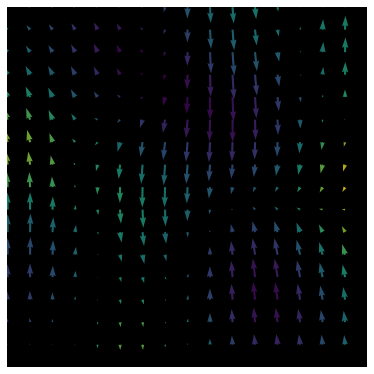

In [42]:
vis = ImageVisualiser(large_blank_image, cut=get_com(original_contour)[0], axis='z', figure_size_in=5)
vis.add_vector_overlay(-dft.GetDisplacementField(), colormap='viridis', arrow_width=3, arrow_scale=2.5, subsample=32, show_colorbar=False)
fig = vis.show()
fig.savefig("results/example_dft")

In [17]:
sitk.WriteTransform(dft, "results/example_dft.tfm")

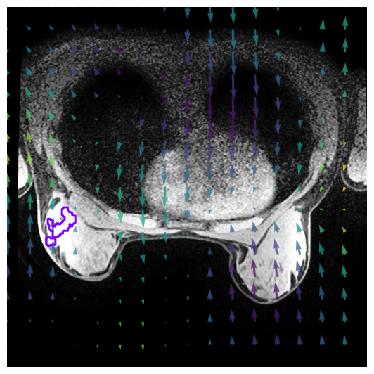

In [33]:
vis = ImageVisualiser(original_T1, cut=get_com(original_contour)[0], axis='z', figure_size_in=5)
vis.add_contour(original_contour)
vis.add_vector_overlay(-dft.GetDisplacementField(), colormap='viridis', arrow_width=3, arrow_scale=2.5, subsample=32, show_colorbar=False)
fig = vis.show()
fig.savefig("results/example_dft_on_image")

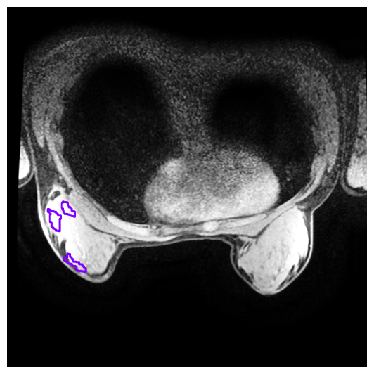

In [29]:
fig = visualise_image(original_T1, dft, contour=original_contour, save_name="results/example_transformed_image")